In [2]:
#Introduction: Exploratory data analysis of customer churnand the dataset.

In [194]:
#Task 1: Data Preparation

In [196]:
import pandas as pd

In [198]:
# Load the dataset
df = pd.read_csv('telco-customer-churn (1).csv')

# Display the first few rows to understand the structure of the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [200]:
# Check for missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [202]:
# Fill missing values for numeric columns with the mean
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # convert if necessary
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# For categorical columns, fill missing values with the most frequent value (mode)
df['Churn'].fillna(df['Churn'].mode()[0], inplace=True)


/var/folders/81/54d6n7k90gd6y99rt_fmlgrw0000gn/T/ipykernel_15632/2645018447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
/var/folders/81/54d6n7k90gd6y99rt_fmlgrw0000gn/T/ipykernel_15632/2645018447.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

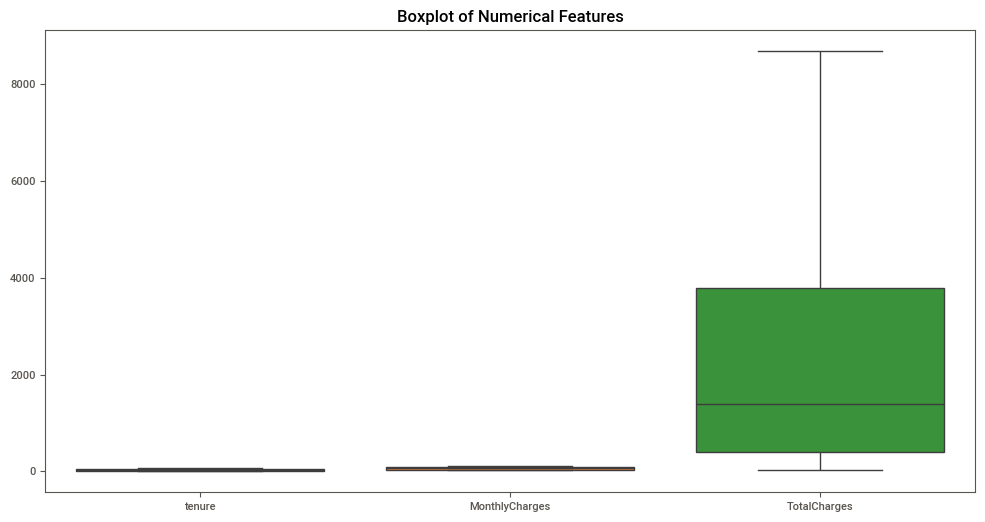

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot to visualize outliers in numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title('Boxplot of Numerical Features')
plt.show()


In [206]:
# Remove outliers by capping the values (replace extreme outliers with upper limit)
upper_limit = df['TotalCharges'].quantile(0.95)
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: upper_limit if x > upper_limit else x)


In [208]:
# Check data types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [210]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['gender', 'Contract', 'InternetService', 'PaymentMethod'], drop_first=True)

# Display the first few rows to confirm encoding
df_encoded.head()


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,Yes,No,1,No,No phone service,No,Yes,No,...,29.85,No,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,...,1889.50,No,True,True,False,False,False,False,False,True
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,...,108.15,Yes,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,No,No,45,No,No phone service,Yes,No,Yes,...,1840.75,No,True,True,False,False,False,False,False,False
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,151.65,Yes,False,False,False,True,False,False,True,False


In [212]:
#Task 2: Listing Data Types:

In [214]:
# Check data types of all columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [216]:
# List of numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_columns)


Numeric columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [218]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [220]:
# Store data types in dictionaries for easier reference
data_types = {
    'Numeric Columns': numeric_columns.tolist(),
    'Categorical Columns': categorical_columns.tolist(),
}

# Print out the data types for documentation
for dtype, columns in data_types.items():
    print(f"{dtype}: {columns}")


Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [222]:
#Task 3: Exploratory Data Analysis (EDA):

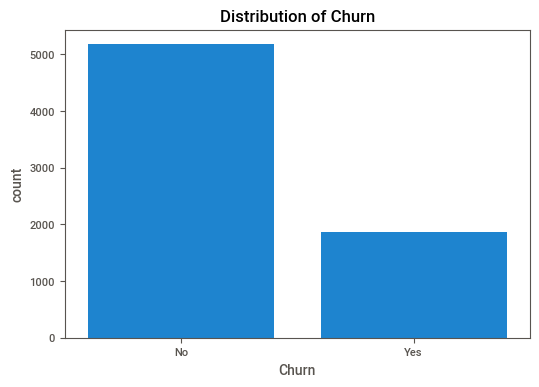

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'Churn'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churn')
plt.show()


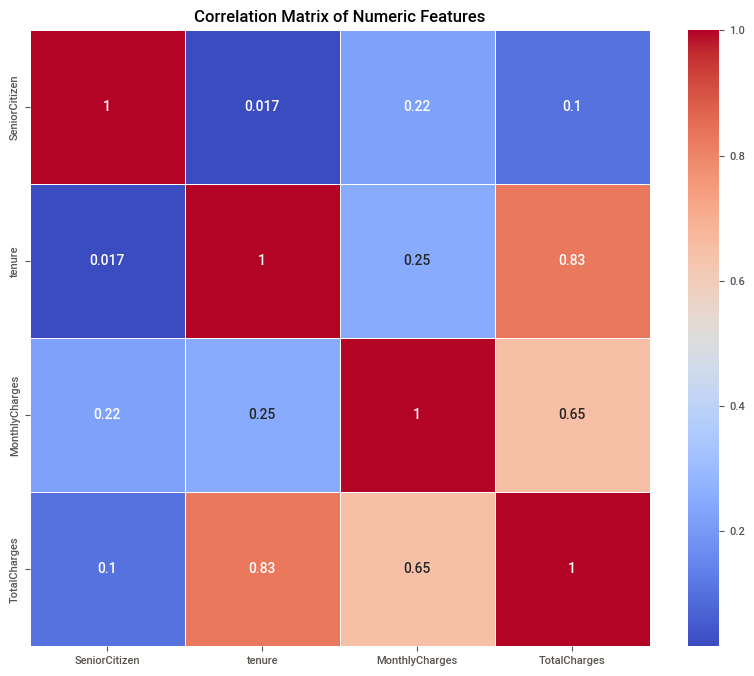

In [226]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix
plt.figure(figsize=(10,8))
correlation_matrix = numeric_df.corr()

# Generate heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


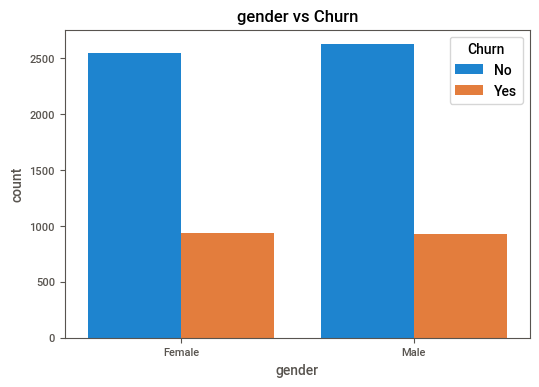

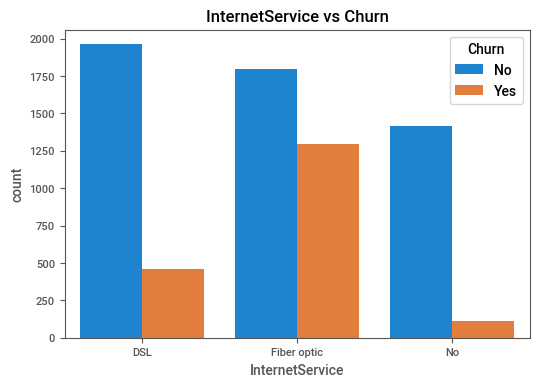

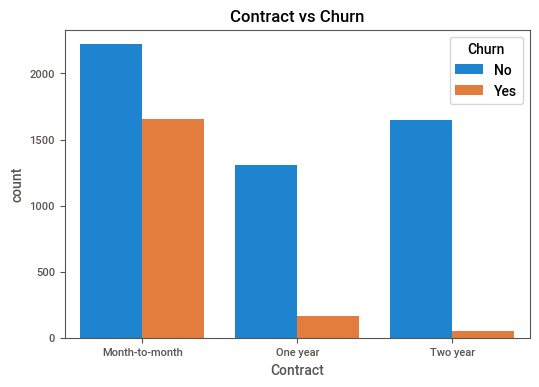

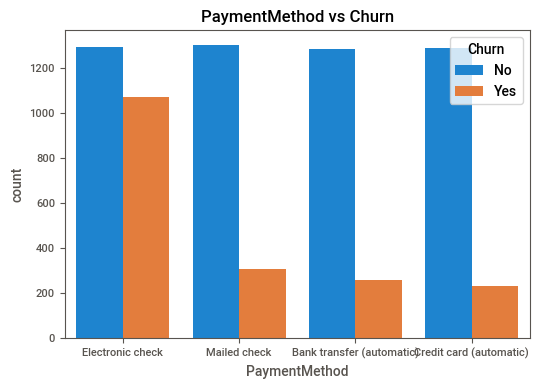

In [228]:
# Create a list of categorical columns
categorical_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Plot churn distribution across categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.show()


In [230]:
# Ensure 'Churn_numeric' column exists
if 'Churn_numeric' not in df.columns:
    df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 2: Select only numeric columns (including 'Churn_numeric')
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Verify that 'Churn_numeric' is in the numeric dataframe
print(numeric_df.columns)

# Step 3: Calculate correlations of numeric columns with 'Churn_numeric'
correlations_with_churn = numeric_df.corr()['Churn_numeric'].sort_values(ascending=False)

# Step 4: Print the correlations
print(correlations_with_churn)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_numeric'],
      dtype='object')
Churn_numeric     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.200229
tenure           -0.352229
Name: Churn_numeric, dtype: float64


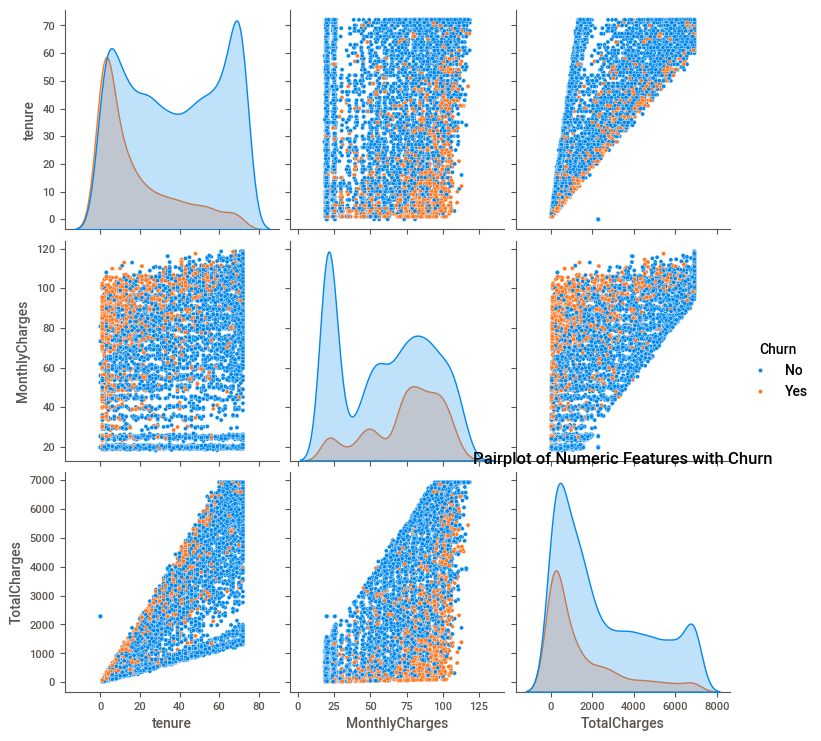

In [232]:
# Pairplot for tenure, MonthlyCharges, and TotalCharges colored by 'Churn'
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.title('Pairplot of Numeric Features with Churn')
plt.show()


In [234]:
# Cross-tabulation between Contract type and PaymentMethod
pd.crosstab(df['Contract'], df['PaymentMethod'], margins=True)


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Contract,,,,,
Month-to-month,589,543,1850,893,3875
One year,391,398,347,337,1473
Two year,564,581,168,382,1695
All,1544,1522,2365,1612,7043


In [236]:
#Task 4: Data Splitting & SweetViz Report:

In [238]:
from sklearn.model_selection import train_test_split


In [240]:
# Print the available columns in the DataFrame
print("Available columns in the DataFrame:", df.columns)

# Check if the required columns exist
required_columns = ['Churn', 'Churn_numeric']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}. Please check your DataFrame.")
else:
    # Define X (features) and y (target)
    X = df.drop(columns=['Churn', 'Churn_numeric'])  # Drop the target columns
    y = df['Churn_numeric']  # Target column

    # Split the dataset into training and test sets (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Verify the split
    print(f"Training set size: {X_train.shape[0]} rows")
    print(f"Test set size: {X_test.shape[0]} rows")


Available columns in the DataFrame: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_numeric'],
      dtype='object')
Training set size: 5634 rows
Test set size: 1409 rows


In [242]:
pip install sweetviz


Note: you may need to restart the kernel to use updated packages.


In [243]:
import sweetviz as sv


In [246]:
# Import the SweetViz library
import sweetviz as sv

# Combine the training features and target into one DataFrame
train_data = X_train.copy()
train_data['Churn_numeric'] = y_train

# Combine the test features and target into one DataFrame
test_data = X_test.copy()
test_data['Churn_numeric'] = y_test

# Create a SweetViz comparison report
report = sv.compare([train_data, "Training Set"], [test_data, "Test Set"])

# Generate the HTML report (it will be saved in your working directory)
report.show_html("sweetviz_comparison_report.html")


                                             |      | [  0%]   00:00 -> (? left)

Report sweetviz_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [180]:
#Task 5: Limitations/Issues:

In [182]:
# Check for missing/null values in the dataset
missing_values = df.isnull().sum()

# Filter out columns that have missing values
missing_values = missing_values[missing_values > 0]

# Display missing values per column
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Series([], dtype: int64)


In [184]:
# Check the distribution of the target variable 'Churn_numeric'
churn_distribution = df['Churn_numeric'].value_counts(normalize=True)

print("Churn distribution (as a percentage):")
print(churn_distribution * 100)


Churn distribution (as a percentage):
Churn_numeric
0    73.463013
1    26.536987
Name: proportion, dtype: float64


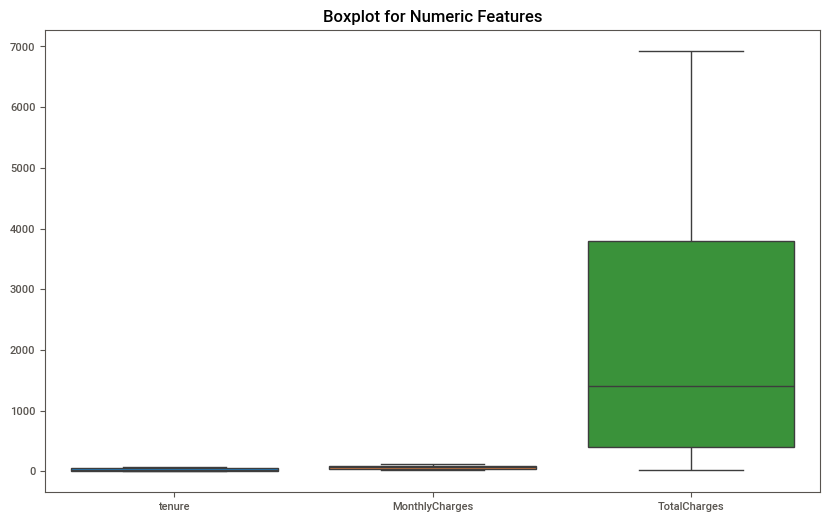

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numeric features to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title('Boxplot for Numeric Features')
plt.show()


In [188]:
# Check unique values for potential formatting issues
print(df['gender'].unique())
print(df['Contract'].unique())
print(df['PaymentMethod'].unique())


['Female' 'Male']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [190]:
# Check the number of rows and columns in the dataset
print("Dataset size:", df.shape)


Dataset size: (7043, 22)


In [192]:
# Check the distribution of categorical variables for potential biases
print(df['gender'].value_counts())
print(df['Contract'].value_counts())


gender
Male      3555
Female    3488
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
